<a href="https://colab.research.google.com/github/mariam-lakhsassi/flowerClassification/blob/main/Classif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#import the libraries
ImageDataGenerator
os


#Generate datasets
##telecharger la data depuis:
https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
##dispatcher dans les dossiers
##traiter la data
##generer la dataset d'entrainnement
##generer la dataset de test
##Standardizing the data

In [10]:
import os
#la repo ou on va stocker
datasets_directory='/content/drive/MyDrive/GIIAS7/premier_projet/ClassificationProject/datasets'
os.makedirs(datasets_directory, exist_ok=True)
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz -P {datasets_directory}
!tar -xvf {datasets_directory}/flower_photos.tgz -C {datasets_directory}


--2024-10-04 17:17:15--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.206.207, 108.177.121.207, 209.85.145.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.206.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘/content/drive/MyDrive/GIIAS7/premier_projet/ClassificationProject/datasets/flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M  47.3MB/s    in 4.8s    

2024-10-04 17:17:20 (45.8 MB/s) - ‘/content/drive/MyDrive/GIIAS7/premier_projet/ClassificationProject/datasets/flower_photos.tgz’ saved [228813984/228813984]

flower_photos/
flower_photos/roses/
flower_photos/roses/14810868100_87eb739f26_m.jpg
flower_photos/roses/1446090416_f0cad5fde4.jpg
flower_photos/roses/15319767030_e6c5602a77_m.jpg
flower_photos/roses/15032112248_30c5284e54_n

In [14]:
import os
import shutil
import random
source_dir='/content/drive/MyDrive/GIIAS7/premier_projet/ClassificationProject/datasets/flower_photos/'
train_dir='/content/drive/MyDrive/GIIAS7/premier_projet/ClassificationProject/datasets/train'
val_dir='/content/drive/MyDrive/GIIAS7/premier_projet/ClassificationProject/datasets/val'
os.makedirs(val_dir, exist_ok=True)
os.makedirs(train_dir, exist_ok=True)
classes=['roses','tulips','daisy','sunflowers','dandelion']
def split_data(source_dir,train_dir,val_dir,split_ratio=0.8):
  for class_name in classes:
    os.makedirs(os.path.join(train_dir,class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir,class_name), exist_ok=True)
    class_dir=os.path.join(source_dir,class_name)
    images = os.listdir(class_dir)
    random.shuffle(images)
    train_size=int(len(images)*split_ratio)
    train_images=images[:train_size]
    val_images=images[train_size:]
    for img in train_images:
      shutil.move(os.path.join(class_dir,img),os.path.join(train_dir,class_name,img))
    for img in val_images:
      shutil.move(os.path.join(class_dir,img),os.path.join(val_dir,class_name,img))
split_data(source_dir,train_dir,val_dir)


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir='/content/drive/MyDrive/GIIAS7/premier_projet/ClassificationProject/datasets/train'
val_dir='/content/drive/MyDrive/GIIAS7/premier_projet/ClassificationProject/datasets/val'
train_datagen = ImageDataGenerator(
    rescale=1./255,   # Normalisation
    rotation_range=40,  # Augmentation des données : rotation jusqu'à 40 degrés
    width_shift_range=0.2,  # Décalage horizontal
    height_shift_range=0.2,  # Décalage vertical
    shear_range=0.2,  # Cisaillement
    zoom_range=0.2,  # Zoom
    horizontal_flip=True,  # Flip horizontal
    fill_mode='nearest'  # Remplissage des pixels vides après transformation
)
val_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical')
val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),batch_size=16,class_mode='categorical')

Found 2934 images belonging to 5 classes.
Found 736 images belonging to 5 classes.


#Build the model

In [7]:
from tensorflow.keras import layers, models

# Définir un modèle CNN
model = models.Sequential()

# Ajouter des couches convolutionnelles et pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Ajouter des couches fully connected
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))  # Couche dense avec 512 neurones
model.add(layers.Dense(5, activation='softmax'))  # Couche de sortie avec softmax pour 5 classes


#train the model

In [8]:


# Compiler le modèle
model.compile(loss='categorical_crossentropy',  # Perte pour la classification multi-classes
              optimizer='adam',  # Optimiseur
              metrics=['accuracy'])  # Mesurer la précision

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,455,173 (13.18 MB)

 Trainable params: 3,455,173 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

##validation du modele


In [9]:
history = model.fit(
    train_generator,                   # Training data generator
    steps_per_epoch= train_generator.batch_size,  # Number of batches per epoch
    epochs=20,                         # Number of epochs to train
    validation_data=val_generator,     # Validation data generator
    validation_steps= val_generator.batch_size  # Number of validation batches per epoch
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 327s 9s/step - accuracy: 0.2620 - loss: 1.6431 - val_accuracy: 0.3242 - val_loss: 1.4145
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 169s 5s/step - accuracy: 0.3873 - loss: 1.3488 - val_accuracy: 0.5000 - val_loss: 1.1274
Epoch 3/20
28/32 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.4889 - loss: 1.1265 

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.4863 - loss: 1.1343 - val_accuracy: 0.5134 - val_loss: 1.1806
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.4990 - loss: 1.1371 - val_accuracy: 0.4336 - val_loss: 1.2883
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.4968 - loss: 1.1250 - val_accuracy: 0.5977 - val_loss: 0.9874
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.5509 - loss: 1.0710 - val_accuracy: 0.6205 - val_loss: 1.0234
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.5958 - loss: 1.0361 - val_accuracy: 0.5352 - val_loss: 1.0434
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.5327 - loss: 1.1016 - val_accuracy: 0.6250 - val_loss: 0.8634
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.6388 - loss: 0.9068 - val_accuracy: 0.6384 - val_loss: 0.8861
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.6409 - loss: 0.9695 - val_accuracy: 0.6250 - val_loss: 0.9733


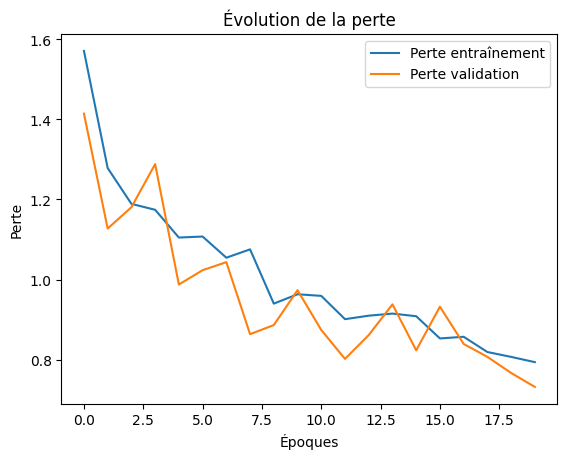

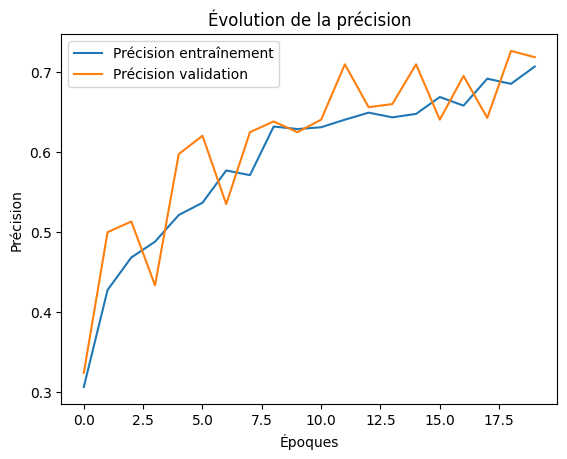

In [10]:
import matplotlib.pyplot as plt

# Courbe de perte
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.title('Évolution de la perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

# Courbe de précision
plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.title('Évolution de la précision')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()


#deploy it
